In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale

from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)

In [71]:
X_1 = np.random.multivariate_normal(mean=[8, 0], cov=[[1, 0], [0, 1]], size=100)
X_2 = np.random.multivariate_normal(mean=[8, 8], cov=[[2, 0], [0, 2]], size=100)
X_3 = np.random.multivariate_normal(mean=[0, 8], cov=[[1, 0], [0, 2]], size=100)
X_4 = np.random.multivariate_normal(mean=[0, 1], cov=[[1, 0], [0, 2]], size=100)
df = np.concatenate([X_1, X_2, X_3, X_4])

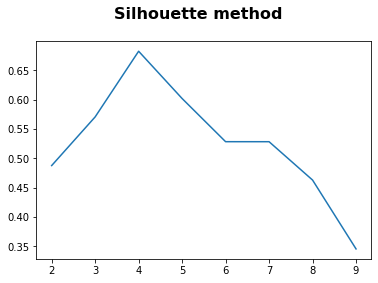

In [97]:
sse_1 = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(df)
    sse_1.append([k, silhouette_score(df, kmeans.labels_)])

plt.suptitle('Silhouette method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse_1)[0], pd.DataFrame(sse_1)[1])

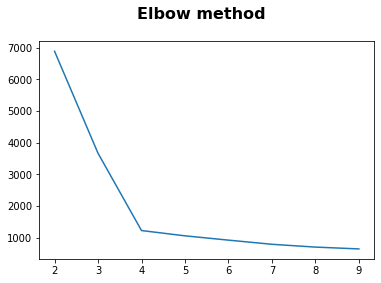

In [96]:
sse = []

for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append([k, km.inertia_])
    
plt.suptitle('Elbow method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])

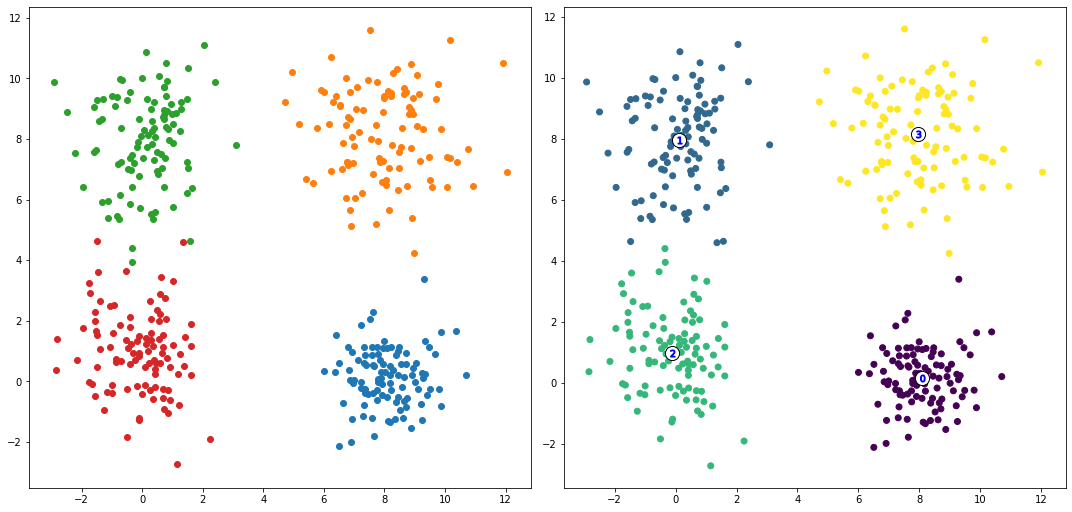

In [73]:
km = KMeans(n_clusters=4)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_


fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].scatter(X_4[:, 0], X_4[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='b')
ax[1].set_aspect('equal')
plt.tight_layout()


In [69]:
X1 = make_circles(factor=0.5, noise=0.1, n_samples=1000)
X2 = make_moons(n_samples=1000, noise=0.1)

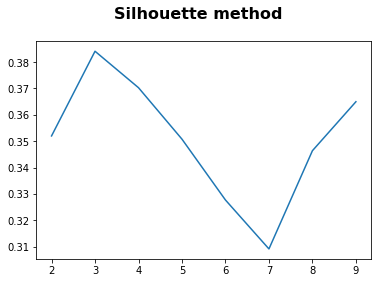

In [107]:
sse_2 = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(X1[0])
    sse_2.append([k, silhouette_score(X1[0], kmeans.labels_)])
    
plt.suptitle('Silhouette method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse_2)[0], pd.DataFrame(sse_2)[1])

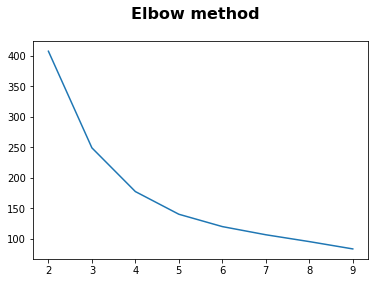

In [106]:
sse2 = []

for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(X1[0])
    sse2.append([k, km.inertia_])
    
plt.suptitle('Elbow method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse2)[0], pd.DataFrame(sse2)[1])

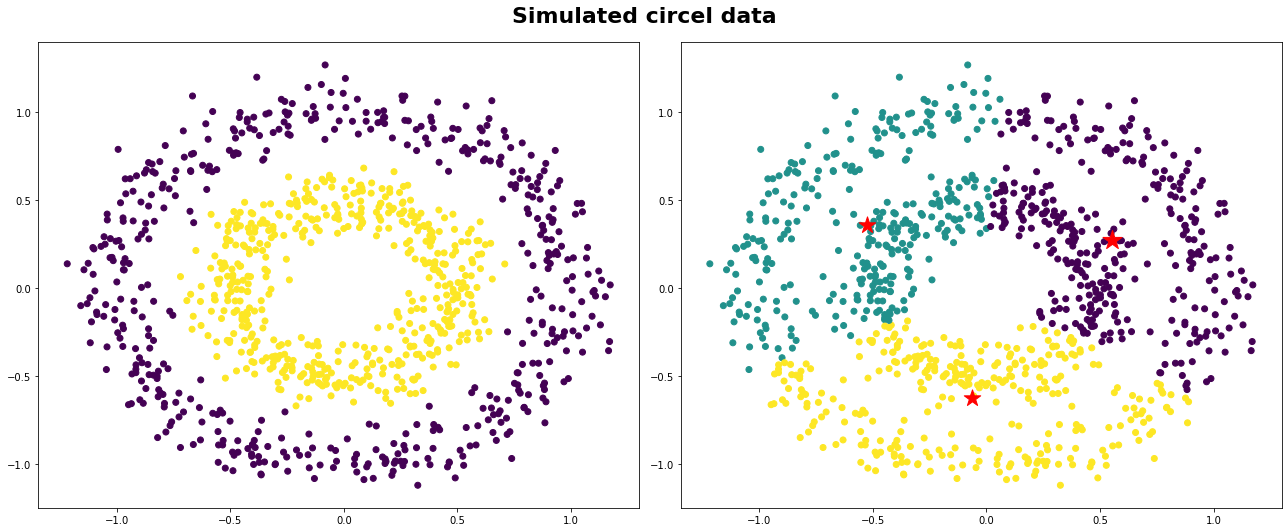

In [104]:
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(18, 7)
km = KMeans(n_clusters=3)
km.fit(X1[0])
labels = km.predict(X1[0])
centroids = km.cluster_centers_

ax[0].scatter(X1[0][:, 0], X1[0][:, 1], c = X1[1])
ax[1].scatter(X1[0][:, 0], X1[0][:, 1], c=labels)
ax[1].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
ax[1].scatter(centroids[1, 0], centroids[1, 1], marker='*', s=300, c='r')
ax[1].scatter(centroids[2, 0], centroids[2, 1], marker='*', s=300, c='r')

plt.suptitle('Simulated circel data', y=1.05, fontsize=22, fontweight ='semibold')
plt.tight_layout()

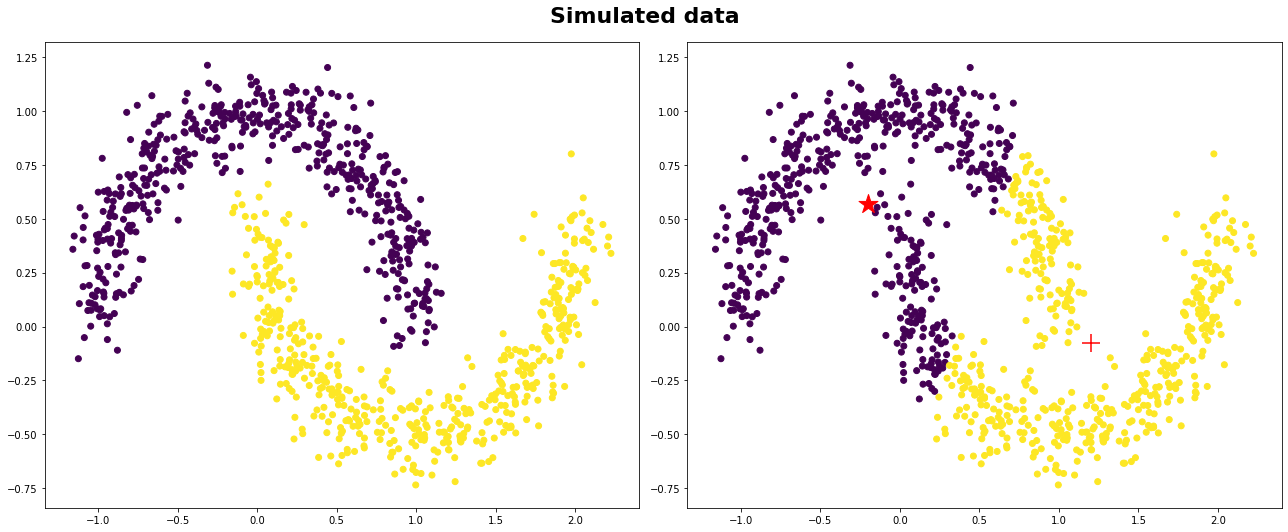

In [65]:
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(18, 7)
km = KMeans(n_clusters=2)
km.fit(X2[0])
labels = km.predict(X2[0])
centroids = km.cluster_centers_

ax[0].scatter(X2[0][:, 0], X2[0][:, 1], c = X2[1])
ax[1].scatter(X2[0][:, 0], X2[0][:, 1], c=labels)
ax[1].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
ax[1].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='r')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight ='semibold')
plt.tight_layout()